## Descriptive Analysis

A notebook to describe the data set with simple statistical tools.

In [22]:
import pandas as pd
import pathlib
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os
from scipy.stats import ttest_rel
import random


# to import ml_colon
sys.path.append(os.path.join(os.getcwd(), os.pardir, 'src')) 

import ml_colon

### Setting up Data Directory

In [5]:
data_dir = ml_colon.HERE.parents[2] / "data" 
print(data_dir)

assert data_dir.exists()

data_files = list(data_dir.glob("*.csv"))
print([f.name for f in data_files])

assert data_files

/Users/nacho/Desktop/DP Project/data_processes_mlcolonoscopy-feature_descriptive_analysis/notebooks/../data
['raw_data.csv', 'data_description.csv']


### Loading Raw Data

In [6]:
_filepath = data_dir / "raw_data.csv"
df = pd.read_csv(_filepath)

# assert all rows have been loaded
len(df) == sum(1 for i in open(_filepath)) -1 # file has header

print(f"Raw data set has: {len(df)} rows")

Raw data set has: 16000 rows


In [7]:
descr_df = pd.read_csv(data_dir / "data_description.csv", index_col="column_name")

In [8]:
print(descr_df)

                                                         description
column_name                                                         
quality              a measure of the quality of the recorded video.
bits               number of bits used to encode that block in th...
intra_parts        number sub-blocks inside this block that are n...
skip_parts         number sub-blocks inside this block that are s...
inter_16x16_parts  number of sub-blocks inside this block making ...
inter_4x4_parts    number of sub-blocks inside this block making ...
inter_other_parts  number of sub-blocks inside this block making ...
non_zero_pixels    number of pixels different from 0 after encodi...
frame_width                  the width of the video frame in pixels.
frame_height                the height of the video frame in pixels.
movement_level     a measure of the level of movement of this fra...
mean                        mean of the pixels of the encoded block.
sub_mean_1         mean of the pix

Let's take a quick look at the actual data.

In [9]:
df.head()

,quality,bits,intra_parts,skip_parts,inter_16x16_parts,inter_4x4_parts,inter_other_parts,non_zero_pixels,frame_width,frame_height,...,sobel_h,sobel_v,variance,block_movement_h,block_movement_v,var_movement_h,var_movement_v,cost_1,cost_2,relevant
0,22,2143,0,0,1,3,21,404,416,240,...,17.397461,17.397461,87.584335,2.820312,2.539062,10.772400,8.576599,0.0,0.0,1.0
1,22,1735,0,2,0,3,8,381,416,240,...,14.426758,14.233398,48.025330,1.843750,1.921875,6.163086,6.665771,8816.0,8801.0,1.0
2,22,1971,0,0,0,0,8,460,416,240,...,15.203125,13.953125,56.613480,3.000000,4.937500,1.625000,3.683594,5104.0,5193.0,1.0
3,22,2473,0,0,0,18,20,421,416,240,...,21.725586,29.165039,283.079285,2.078125,2.500000,25.806396,34.656250,21531.0,19802.0,1.0
4,22,1093,0,0,1,3,8,167,416,240,...,11.929688,14.353516,175.123245,3.070312,4.523438,22.252869,14.780701,15073.0,14549.0,1.0


Let's take a quick look at the datatypes in the dataframe

In [10]:
df.dtypes

quality                int64
bits                   int64
intra_parts            int64
skip_parts             int64
inter_16x16_parts      int64
inter_4x4_parts        int64
inter_other_parts      int64
non_zero_pixels        int64
frame_width            int64
frame_height           int64
movement_level         int64
mean                 float64
sub_mean_1           float64
sub_mean_2           float64
sub_mean_3           float64
sub_mean_4           float64
var_sub_blocks       float64
sobel_h              float64
sobel_v              float64
variance             float64
block_movement_h     float64
block_movement_v     float64
var_movement_h       float64
var_movement_v       float64
cost_1               float64
cost_2               float64
relevant             float64
dtype: object

Conclusion:
Looks like we are only dealing with numerical data (no characters, strings, datetimes, ...)

However, the int64 types seem to be discrete and may need special care.

### Missing Values?

Next, let's take a look if there are any Nulls, NaNs in the data set and if so how many.

In [11]:
_null_df = df.isnull().sum()

print(_null_df[_null_df > 0])

sub_mean_3    14
cost_2        17
relevant       2
dtype: int64


The missing values for sub_mean_3 and cost_2 maybe can be imputed / recovered. (or dropped since there are only 17 at most)

For the target variable "relevant" not. It's probably best to drop these 2 rows as we later also want to exclude them from training / testing the model and its only a total of 2 rows...

In [12]:
df = df[~df.relevant.isnull()]

len(df)

15998

### Column Analysis

We want to go over each variable in the dataset and explore it with simple descriptive statistics.

A first overview can be seen here:

In [13]:
df.describe()

,quality,bits,intra_parts,skip_parts,inter_16x16_parts,inter_4x4_parts,inter_other_parts,non_zero_pixels,frame_width,frame_height,...,sobel_h,sobel_v,variance,block_movement_h,block_movement_v,var_movement_h,var_movement_v,cost_1,cost_2,relevant
count,15998.000000,15998.000000,15998.000000,15998.000000,15998.000000,15998.000000,15998.000000,15998.000000,15998.000000,15998.000000,...,15998.000000,15998.000000,15998.000000,15998.000000,15998.000000,15998.000000,15998.000000,15998.000000,15981.000000,15998.000000
mean,29.500938,449.697400,11.041380,0.849294,0.995499,1.977997,3.685273,74.059007,1432.075009,850.046256,...,8.027204,8.270743,53.333526,8.024506,6.797750,842.053206,491.974570,36943.436492,42055.148051,0.822353
std,5.590065,549.099212,19.051407,1.181890,1.018540,3.901329,4.445079,102.584098,851.931382,530.222216,...,9.184985,9.552621,107.271594,17.260686,11.552863,3815.457401,2404.213566,38630.539744,43844.993440,0.382227
min,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,416.000000,240.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,520.000000,300.000000,...,0.896240,0.943359,1.424382,0.500000,0.500000,0.687500,0.746094,9916.250000,10964.000000,1.000000
50%,32.000000,243.000000,0.000000,0.000000,1.000000,0.000000,2.000000,33.000000,1920.000000,1080.000000,...,5.170898,5.313477,14.525076,2.625000,3.214844,11.685547,19.544434,23048.500000,26132.000000,1.000000
75%,35.750000,622.000000,16.000000,1.000000,2.000000,3.000000,6.000000,100.000000,2400.000000,1470.000000,...,11.628906,11.776123,52.494077,7.062500,8.062500,94.125549,96.068176,52043.250000,59856.000000,1.000000
max,37.000000,4771.000000,64.000000,4.000000,4.000000,33.000000,27.000000,828.000000,2560.000000,1600.000000,...,69.706055,66.775391,2022.197998,322.093750,189.000000,194634.750000,68389.359375,425705.000000,446306.000000,1.000000


#### Column: Quality

In [11]:
column_name = "quality"
print(descr_df.loc[column_name, "description"])

sns.histplot(df[column_name].values)

a measure of the quality of the recorded video.


AttributeError: module 'seaborn' has no attribute 'histplot'

In [14]:
df[column_name].value_counts()

37    4000
27    4000
32    4000
22    3998
Name: quality, dtype: int64

Looks like a Discrete uniform distribution, but maybe data set was sampled in that way...


#### Column: Bits

In [15]:

column_name = "bits"
print(descr_df.loc[column_name, "description"])

number of bits used to encode that block in the video stream.


AttributeError: module 'seaborn' has no attribute 'histplot'

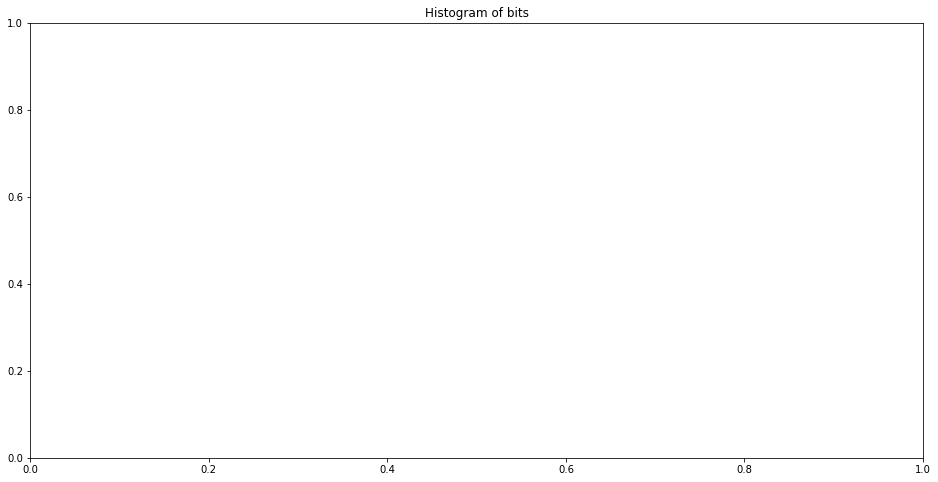

In [16]:

fig, ax = plt.subplots(figsize=(16,8))

ax.set_title(f"Histogram of {column_name}")

sns.histplot(df[column_name].values, ax=ax)

The distribution is highly skewed and it looks like most of the blocks are encoded using only a few bits.
This raises the question: Are there blocks that allegedly are encoded with 0 bits in the video stream?

Note: This should not be possible as 0 bits would mean 0 information in my opinion. 

Let's identify the characteristics of the rows whose value of "bits" is 0

In [ ]:
df[df["bits"]==0].head()

In [ ]:
df[df["bits"]==0].sum()

When the value of <i>bits</i> is 0, <i>intra_parts, inter_16x16_parts, inter_4x4_parts, inter_other_parts, non_zero_pixels, block_movement_h, block_movement_v, var_movement_h, var_movement_v</i> are zero as well. So, what do they represent?

In [ ]:
pd.options.display.max_colwidth = 200
descr_df.loc[df[df["bits"]==0].sum()==0]

In [ ]:
print("Number of rows with 0 bits: ", len(df[df[column_name] ==0]))

In [ ]:
pd.cut(df[column_name], bins=[0, 8, 16, 32, 64, 124], include_lowest=False).value_counts(sort=False)

There are some block that are encoded with a very small number of bits. 696 rows are encoded with at most 8 bits. Will be interesting to see how quality depends on number of bits...For now we keep these rows but potentially these rows we have to deal with separately.

#### intra_parts

In [ ]:
column_name = "intra_parts"
print(descr_df.loc[column_name, "description"])

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

ax.set_title(f"Histogram of {column_name}")

sns.histplot(df[column_name].values, ax=ax)

In [ ]:
df[column_name].value_counts(sort=False)

The big majority of rows have 0 sub-blocks. Not sure if I yet understand what these sub-blocks are...

#### skip_parts

In [ ]:
column_name = "skip_parts"
print(descr_df.loc[column_name, "description"])

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

ax.set_title(f"Histogram of {column_name}")
sns.histplot(df[column_name])

In [ ]:
df.columns

#### inter_16x16_parts

In [ ]:
column_name = "inter_16x16_parts"
print(descr_df.loc[column_name, "description"])

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

ax.set_title(f"Histogram of {column_name}")
sns.histplot(df[column_name])

This is difficult to interpret. The description is not clear. 

#### Column: inter_4x4_parts

In [ ]:
column_name = "inter_4x4_parts"
print(descr_df.loc[column_name, "description"])

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

ax.set_title(f"Histogram of {column_name}")
sns.histplot(df[column_name])

The above two plots have shown that bigger sub-blocks have less information overlap than small sub-blocks. 

#### inter_other_parts

In [ ]:
column_name = "inter_other_parts"
print(descr_df.loc[column_name, "description"])

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

ax.set_title(f"Histogram of {column_name}")
sns.histplot(df[column_name])

#### non_zero_pixels

In [ ]:
column_name = "non_zero_pixels"
print(descr_df.loc[column_name, "description"])

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

ax.set_title(f"Histogram of {column_name}")
sns.histplot(df[column_name])

#### frame_width

In [ ]:
column_name = "frame_width"
print(descr_df.loc[column_name, "description"])

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

ax.set_title(f"Histogram of {column_name}")
sns.histplot(df[column_name])

#### frame_height

In [ ]:
column_name = "frame_height"
print(descr_df.loc[column_name, "description"])

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

ax.set_title(f"Histogram of {column_name}")
sns.histplot(df[column_name])

#### movement_level

In [ ]:
column_name = "movement_level"
print(descr_df.loc[column_name, "description"])

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

ax.set_title(f"Histogram of {column_name}")
sns.histplot(df[column_name])

#### mean

In [ ]:
column_name = "mean"
print(descr_df.loc[column_name, "description"])

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

ax.set_title(f"Histogram of {column_name}")
sns.histplot(df[column_name])

#### sub_mean_1

In [ ]:
column_name = "sub_mean_1"
print(descr_df.loc[column_name, "description"])

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

ax.set_title(f"Histogram of {column_name}")
sns.histplot(df[column_name])

#### sub_mean_2

In [ ]:
column_name = "sub_mean_2"
print(descr_df.loc[column_name, "description"])

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

ax.set_title(f"Histogram of {column_name}")
sns.histplot(df[column_name])

#### sub_mean_3

In [ ]:
column_name = "sub_mean_3"
print(descr_df.loc[column_name, "description"])

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

ax.set_title(f"Histogram of {column_name}")
sns.histplot(df[column_name])

#### sub_mean_4

In [ ]:
column_name = "sub_mean_4"
print(descr_df.loc[column_name, "description"])

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

ax.set_title(f"Histogram of {column_name}")
sns.histplot(df[column_name])

#### var_sub_blocks

In [ ]:
column_name = "var_sub_blocks"
print(descr_df.loc[column_name, "description"])

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

ax.set_title(f"Histogram of {column_name}")
sns.histplot(df[column_name])

#### sobel_h

In [ ]:
column_name = "sobel_h"
print(descr_df.loc[column_name, "description"])

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

ax.set_title(f"Histogram of {column_name}")
sns.histplot(df[column_name])

#### sobel_v

In [ ]:
column_name = "sobel_v"
print(descr_df.loc[column_name, "description"])

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

ax.set_title(f"Histogram of {column_name}")
sns.histplot(df[column_name])

#### variance

In [ ]:
column_name = "variance"
print(descr_df.loc[column_name, "description"])

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

ax.set_title(f"Histogram of {column_name}")
sns.histplot(df[column_name])

#### block_movement_h

In [ ]:
column_name = "block_movement_h"
print(descr_df.loc[column_name, "description"])

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

ax.set_title(f"Histogram of {column_name}")
sns.histplot(df[column_name])

#### block_movement_v

In [ ]:
column_name = "block_movement_v"
print(descr_df.loc[column_name, "description"])

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

ax.set_title(f"Histogram of {column_name}")
sns.histplot(df[column_name])

#### var_movement_h

In [ ]:
column_name = "var_movement_h"
print(descr_df.loc[column_name, "description"])

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

ax.set_title(f"Histogram of {column_name}")
sns.histplot(df[column_name])

#### var_movement_v

In [ ]:
column_name = "var_movement_v"
print(descr_df.loc[column_name, "description"])

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

ax.set_title(f"Histogram of {column_name}")
sns.histplot(df[column_name])

#### cost_1

In [ ]:
column_name = "cost_1"
print(descr_df.loc[column_name, "description"])

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

ax.set_title(f"Histogram of {column_name}")
sns.histplot(df[column_name])

#### cost_2

In [ ]:
column_name = "cost_2"
print(descr_df.loc[column_name, "description"])

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

ax.set_title(f"Histogram of {column_name}")
sns.histplot(df[column_name])

### Target variable: relevant 

In [ ]:
column_name = "relevant"
print(descr_df.loc[column_name, "description"])

In [ ]:
print("Relevant == 1: ", len(df[df.relevant == 1]))
print("Relevant == 0: ", len(df[df.relevant == 0]))

print("Percentage where relevant is 1 out of all: ",len(df[df.relevant == 1])/ len(df))

Conclusion of relevant:

There is a high difference in the number of relevant blocks and irrelevant blocks. In the machine learning we may need to stratify the data to not favor the algorithm of predicting 1 all the time. If we do not take this into account, we can create a very simple algorithm already with 82% accuracy (just predict 1 all the time).

As the outcome variable is binary, we should look into methods of classification, e.g. logistic regression / decision tree / neural networks

In order to consider which variables should be constant and categorical we explore the number of unique values of each of them

In [14]:
df.nunique()

quality                  4
bits                  2105
intra_parts             15
skip_parts               5
inter_16x16_parts        5
inter_4x4_parts         12
inter_other_parts       28
non_zero_pixels        568
frame_width              4
frame_height             4
movement_level         205
mean                  6598
sub_mean_1            3123
sub_mean_2            3022
sub_mean_3            3072
sub_mean_4            2975
var_sub_blocks       11455
sobel_h               9907
sobel_v               9894
variance             11999
block_movement_h      2368
block_movement_v      2221
var_movement_h        8426
var_movement_v        8449
cost_1               14377
cost_2               14536
relevant                 2
dtype: int64

We split into continuous and constant variables

In [15]:
cat = df.loc[:, df.nunique() < 29]
cont = df.loc[:, df.nunique() >= 29]
varlist = cont.columns.tolist()
varlist.append('relevant')
contRelv = df[varlist]

In [23]:
contRelv.groupby('relevant').mean()

,bits,non_zero_pixels,movement_level,mean,sub_mean_1,sub_mean_2,sub_mean_3,sub_mean_4,var_sub_blocks,sobel_h,sobel_v,variance,block_movement_h,block_movement_v,var_movement_h,var_movement_v,cost_1,cost_2
relevant,,,,,,,,,,,,,,,,,,
0.0,151.527094,21.776918,4.857270e+06,1.579388,1.772326,1.684585,1.589222,1.271418,4.234237,4.183534,4.216856,29.598292,7.685221,5.121575,977.899925,411.026926,30345.427164,34941.264344
1.0,514.109076,85.353147,3.856880e+06,3.874461,3.441059,3.225339,3.346922,3.189547,7.055798,8.857525,9.146477,58.460886,8.097799,7.159843,812.707176,509.461132,38368.758969,43593.241172


In this table we can check the difference between the relevant categories, which looks significative

In [28]:
def equality_testing(df, variables, y):
    for var in variables:
        group0 = df.loc[df[y] == 0][var].tolist()
        group1 = df.loc[df[y] == 1][var].tolist()
        print(var)
        # Some variables have different length depending the group
        maxSize = max(len(group0), len(group1))
        group0 = random.choices(group0, k = maxSize)
        group1 = random.choices(group1, k = maxSize)
        
        if ttest_rel(group0, group1).pvalue >=0.5:
            print("The groups have the same mean.") 
        else:
            print("The groups are different.")

With this function we make use of the T-test in order to confirm if the groups are statistically different

In [29]:
equality_testing(contRelv, contRelv.columns[:-1].tolist(), contRelv.columns[-1])

bits
The groups are different.
non_zero_pixels
The groups are different.
movement_level
The groups are different.
mean
The groups are different.
sub_mean_1
The groups are different.
sub_mean_2
The groups are different.
sub_mean_3
The groups are different.
sub_mean_4
The groups are different.
var_sub_blocks
The groups are different.
sobel_h
The groups are different.
sobel_v
The groups are different.
variance
The groups are different.
block_movement_h
The groups are different.
block_movement_v
The groups are different.
var_movement_h
The groups are different.
var_movement_v
The groups are different.
cost_1
The groups are different.
cost_2
The groups are different.


Now we can see how the categorical variables correlate with the relevant variable

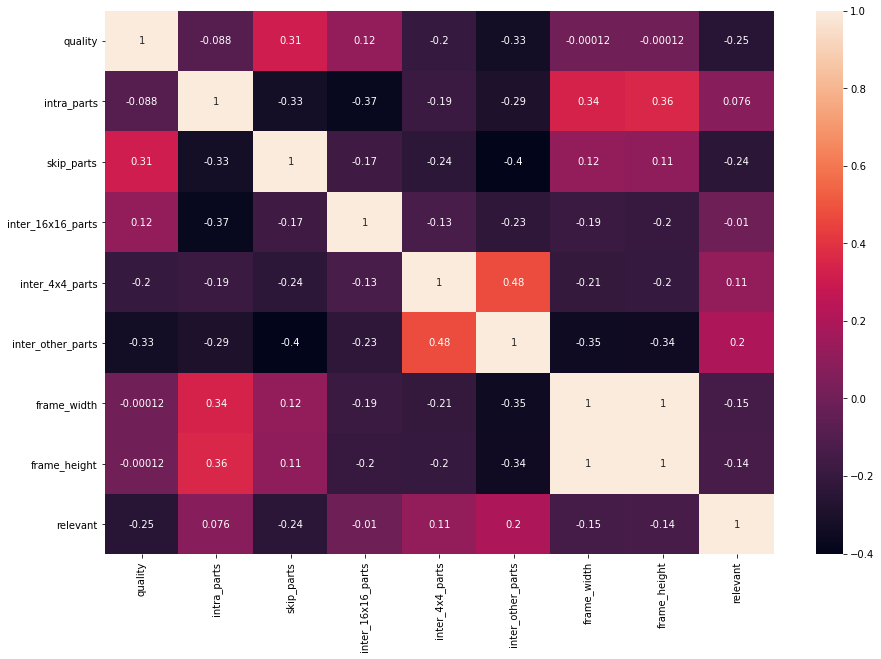

In [16]:
plt.figure(figsize=(15, 10))
corr_mtx = cat.corr()
sns.heatmap(corr_mtx, annot=True)

Now we do the same with the continuous variables

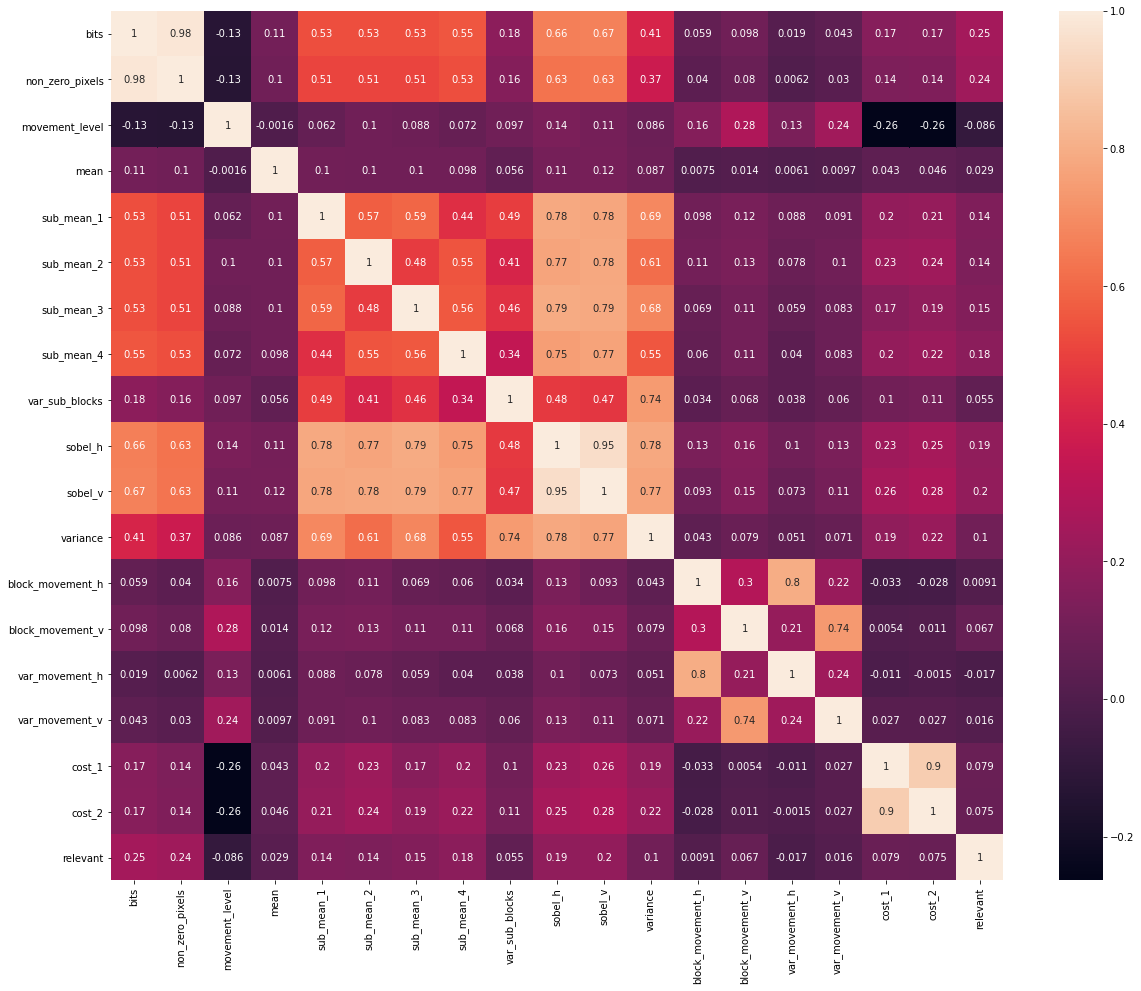

In [19]:
plt.figure(figsize=(20, 16))
corr_mtx = contRelv.corr()
sns.heatmap(corr_mtx, annot=True)

We can study to reduce the cross-correlation and/or to delete some variables